In [92]:
import pickle


def l2norm(list1, list2):
    l2_norm_difference = sum((x - y) ** 2 for x, y in zip(list1, list2)) ** 0.5
    l2_norm_reference = sum(y**2 for y in list1) ** 0.5
    return l2_norm_difference / l2_norm_reference


def get_record(cnum, dataset, model, setup):
    rec_path = f"./rec_fed_sample_time/{model}_model_{cnum}_{dataset}_{setup}.rec"
    with open(rec_path, "rb") as res_file:
        record = pickle.load(res_file)
    return record

In [ ]:
import os

dataset = "emnist"
model = "linear" # cnn linear
setup = "same"

cnums = [3, 6, 10]
data = {}

for cnum in cnums:
    data_filepath = f"variance/data_{cnum}_{model}_{dataset}_{setup}.pk"
    with open(data_filepath, "rb") as data_file:
        data[cnum] = pickle.load(data_file)

data

{3: {'MC-Random': [(1, 92.04247679898981, 1.0),
   (1, 81.83602033299394, 1.0),
   (1, 81.83602033299394, 1.0),
   (1, 1.086961337015964, 1.0),
   (1, 130.4447062589461, 1.0),
   (1, 83.33192983700428, 1.0),
   (1, 83.33192983700428, 1.0),
   (1, 130.4447062589461, 1.0),
   (1, 137.14340956800152, 1.0),
   (1, 92.04247679898981, 1.0),
   (1, 81.83602033299394, 1.0),
   (1, 1.086961337015964, 1.0),
   (1, 83.33192983700428, 1.0),
   (1, 92.04247679898981, 1.0),
   (1, 138.80622804095037, 1.0),
   (1, 137.14340956800152, 1.0),
   (1, 178.1072235329775, 1.0),
   (1, 81.83602033299394, 1.0),
   (1, 1.086961337015964, 1.0),
   (1, 130.4447062589461, 1.0),
   (1, 83.33192983700428, 1.0),
   (1, 1.086961337015964, 1.0),
   (1, 1.086961337015964, 1.0),
   (1, 178.1072235329775, 1.0),
   (1, 178.1072235329775, 1.0),
   (1, 178.1072235329775, 1.0),
   (1, 137.14340956800152, 1.0),
   (1, 81.83602033299394, 1.0),
   (1, 81.83602033299394, 1.0),
   (1, 130.4447062589461, 1.0),
   (1, 81.8360203329

In [94]:
import matplotlib.pylab as plt

# plt.style.use("ggplot")
# plt.rcParams["axes.prop_cycle"]
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams["mathtext.rm"] = "Times New Roman"

In [95]:
import numpy as np

variances = {}

for cnum in cnums:
    gammas = list(range(1, 2**cnum + 1))
    variances[cnum] = {}
    for alg, alg_data in data[cnum].items():
        errors = {gamma: [] for gamma in gammas}
        for gamma, time, error in alg_data:
            errors[gamma].append(error)
        variances[cnum][alg] = [np.var(errors[gamma]) for gamma in gammas]

variances

{3: {'MC-Random': [0.0,
   0.0017942782436499247,
   0.014522797558680817,
   0.03158100436264597,
   0.07615164465719568,
   0.10252153456276913,
   0.09986283916210903,
   0.0],
  'CC-Random': [0.0,
   0.009364070258226173,
   0.09252780529934719,
   0.16885582562590185,
   0.2172144015947404,
   0.23876713210052503,
   0.19874741503213078,
   0.0]},
 6: {'MC-Random': [0.0,
   2.829914028198617e-05,
   0.0015489606668390376,
   0.0004223155701551319,
   0.002626103989783256,
   0.006041230113062148,
   0.008102032262528869,
   0.015494375705163724,
   0.009171854746700353,
   0.014067568534819988,
   0.016153332245720412,
   0.018694851328477254,
   0.017001027813169117,
   0.018602424636722337,
   0.03396898697665825,
   0.03567134677202992,
   0.03905830361159118,
   0.04592944258199716,
   0.028757544558037168,
   0.042583096163014124,
   0.048257737590020174,
   0.05164654514602428,
   0.04274196643469125,
   0.041847588458907486,
   0.05283382117418971,
   0.06646273043718368,
 

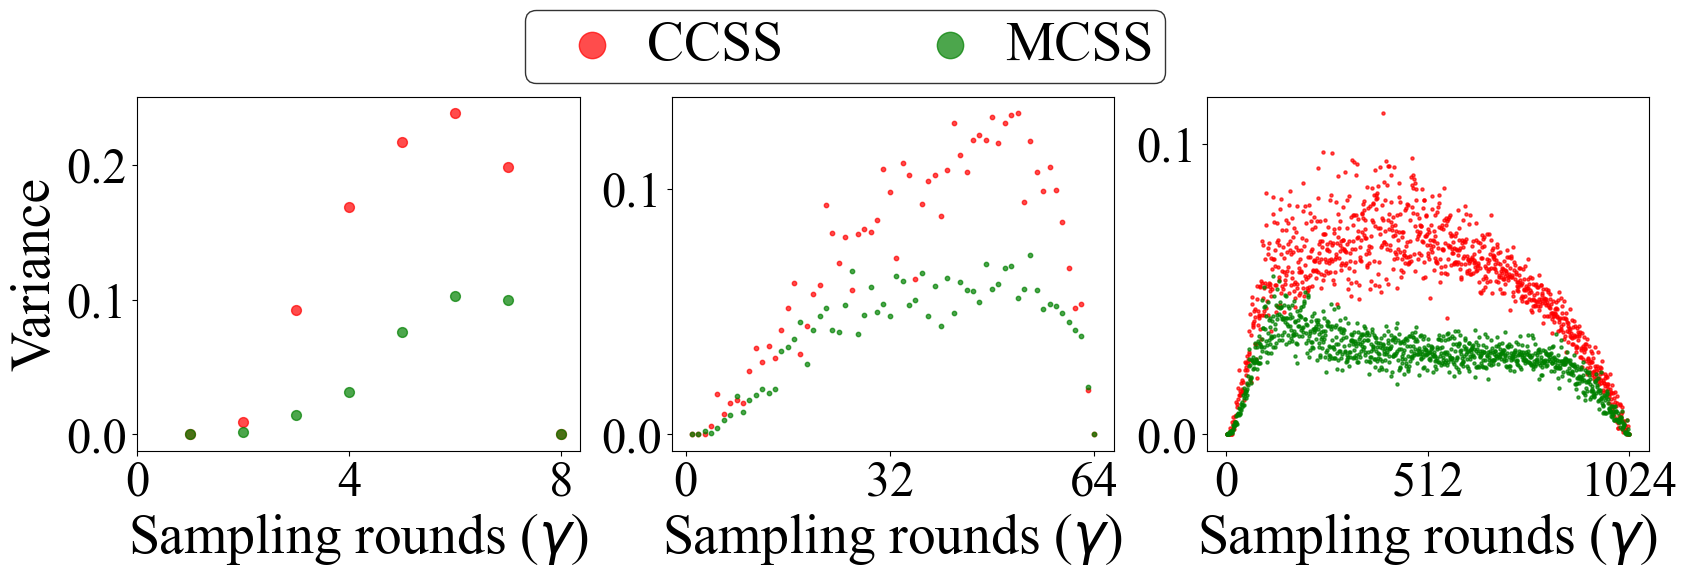

In [101]:
import math
import matplotlib.pyplot as plt

fontsize = 40
labelsize = 35
colors = {"IPSS": "blue", "MC-Random": "green", "CC-Random": "red"}
labels = {"IPSS": "IPSS", "MC-Random": "MCSS", "CC-Random": "CCSS"}

# 定义不同 cnum 的参数
params = {
    3: {"dot_size": 50, "xticks": [0, 4, 8]},
    6: {"dot_size": 10, "xticks": [0, 32, 64]},
    10: {"dot_size": 5, "xticks": [0, 512, 1024]},
}

fig, axes = plt.subplots(1, 3, figsize=(17, 5))
axes: list[plt.Axes]

for i, cnum in enumerate(cnums):
    ax = axes[i]
    dot_size = params[cnum]["dot_size"]
    xticks = params[cnum]["xticks"]
    
    gammas = list(range(1, 2**cnum + 1))
    for alg in ["CC-Random", "MC-Random"]:
        scatter = ax.scatter(gammas, variances[cnum][alg], s=dot_size, label=labels[alg], color=colors[alg], alpha=0.7)
    
    ax.set_xlabel("Sampling rounds ($\\gamma$)", fontsize=fontsize)
    ax.set_xticks(xticks)
    if model == "linear" and cnum in [6, 10]:
        ax.set_yticks([0, 0.1])
    ax.tick_params(axis="both", labelsize=labelsize)

axes[0].set_ylabel("Variance", fontsize=fontsize)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    loc="upper center",
    bbox_to_anchor=(0.5, 1.2),
    ncol=2,
    fontsize=fontsize,
    frameon=True,
    edgecolor="black",
    borderpad=0.2,
    handletextpad=0,
    markerscale=6 / math.sqrt(dot_size),
)

plt.tight_layout()
plt.savefig(f"figs/variance/variance_{model}_{dataset}_{setup}.png", bbox_inches="tight")
plt.show()
